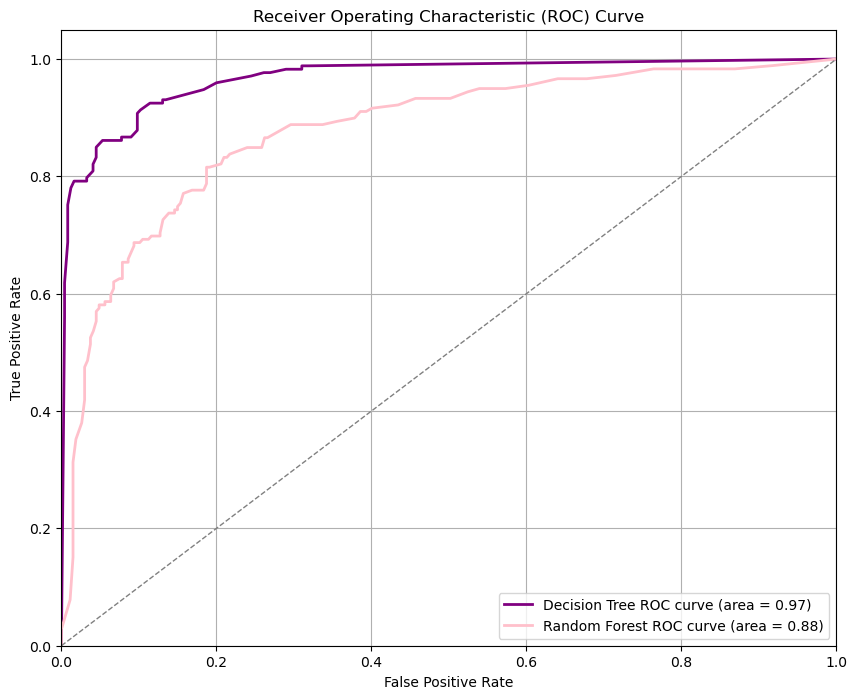

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load data
df_dt = pd.read_csv('new_submission_with_true_labels.csv')
df_rf = pd.read_csv('rforest_with_true_labels.csv')

# Decision Tree data
y_dt_true = df_dt['Survived'].values
y_dt_score = df_dt['Survival_Probability'].values

# Random Forest data
y_rf_true = df_rf['Survived'].values
y_rf_score = df_rf['Survived_Prob'].values

# Compute ROC curve and ROC area for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_dt_true, y_dt_score)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Compute ROC curve and ROC area for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_rf_true, y_rf_score)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_dt, tpr_dt, color='purple', lw=2, label=f'Decision Tree ROC curve (area = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='pink', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()